In [1]:
# Adapted from M.X. Cohen

import numpy as np
import math
import matplotlib.pyplot as plt
import random
import timeit
import scipy.fftpack
import scipy.io as sio
from scipy import stats
from scipy import signal
from scipy import interpolate
from PIL import Image
from skimage import filters
import scipy.ndimage as ndimage
import scipy
import imageio
from skimage.morphology import disk

# Google Sheets Link

https://docs.google.com/document/d/1ZRc-jSjPBN2ZQVElUd9T-Lfzk6sQjUbP3qRj14w4L9Q/edit?ts=5e8cc5e4

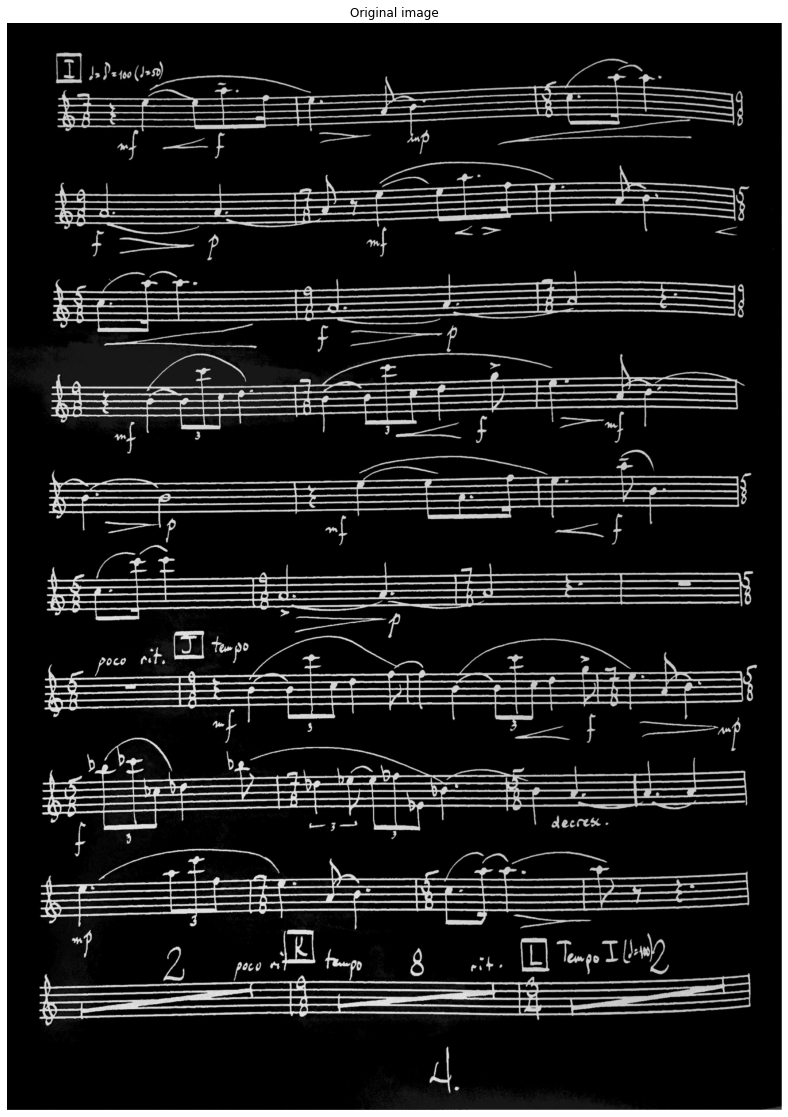

# Test SLIC with entire image

In [5]:
import numpy as np

from fast_slic import Slic
from PIL import Image


image = np.asarray(Image.open("./data/nc4.jpg"))
# import cv2; image = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)   # You can convert the image to CIELAB space if you need.
slic = Slic(num_components=1600, compactness=10)
assignment = slic.iterate(image) # Cluster Map
print(assignment)
print(slic.slic_model.clusters) # The cluster information of superpixels.






[[   0    0    0 ...   38   38   38]
 [   0    0    0 ...   38   38   38]
 [   0    0    0 ...   38   38   38]
 ...
 [1393 1393 1393 ... 1396 1370 1370]
 [1393 1393 1393 ... 1370 1370 1370]
 [1393 1393 1393 ... 1370 1370 1370]]
[{'number': 0, 'yx': (42.0, 30.0), 'color': (200.0, 128.0, 128.0), 'num_members': 1849}, {'number': 1, 'yx': (49.0, 92.0), 'color': (200.0, 128.0, 128.0), 'num_members': 1996}, {'number': 2, 'yx': (43.0, 155.0), 'color': (200.0, 128.0, 128.0), 'num_members': 1909}, {'number': 3, 'yx': (53.0, 215.0), 'color': (200.0, 128.0, 128.0), 'num_members': 1962}, {'number': 4, 'yx': (39.0, 275.0), 'color': (200.0, 128.0, 128.0), 'num_members': 1882}, {'number': 5, 'yx': (70.0, 325.0), 'color': (200.0, 128.0, 128.0), 'num_members': 2032}, {'number': 6, 'yx': (38.0, 385.0), 'color': (200.0, 128.0, 128.0), 'num_members': 2119}, {'number': 7, 'yx': (69.0, 444.0), 'color': (200.0, 128.0, 128.0), 'num_members': 2385}, {'number': 8, 'yx': (49.0, 506.0), 'color': (200.0, 128.0, 12

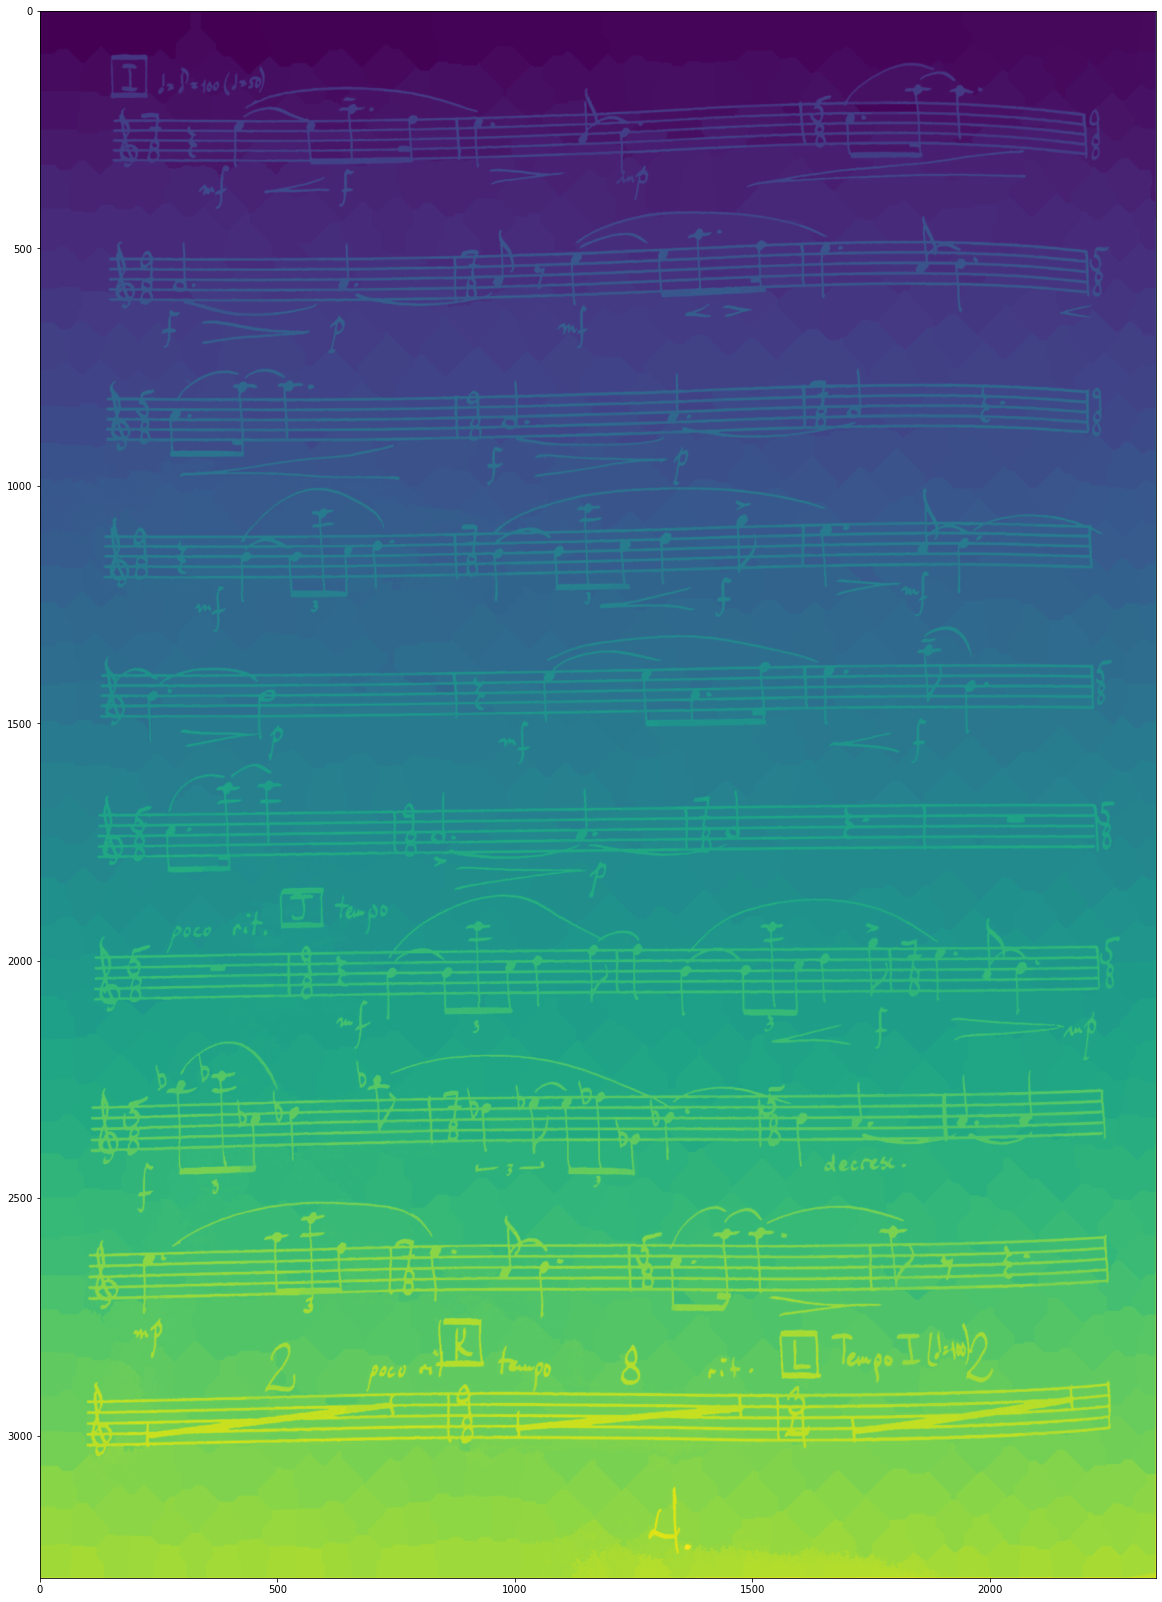

In [7]:
plt.figure(figsize=(20,30))
plt.imshow(assignment+music)

# Test SLIC with segmented image

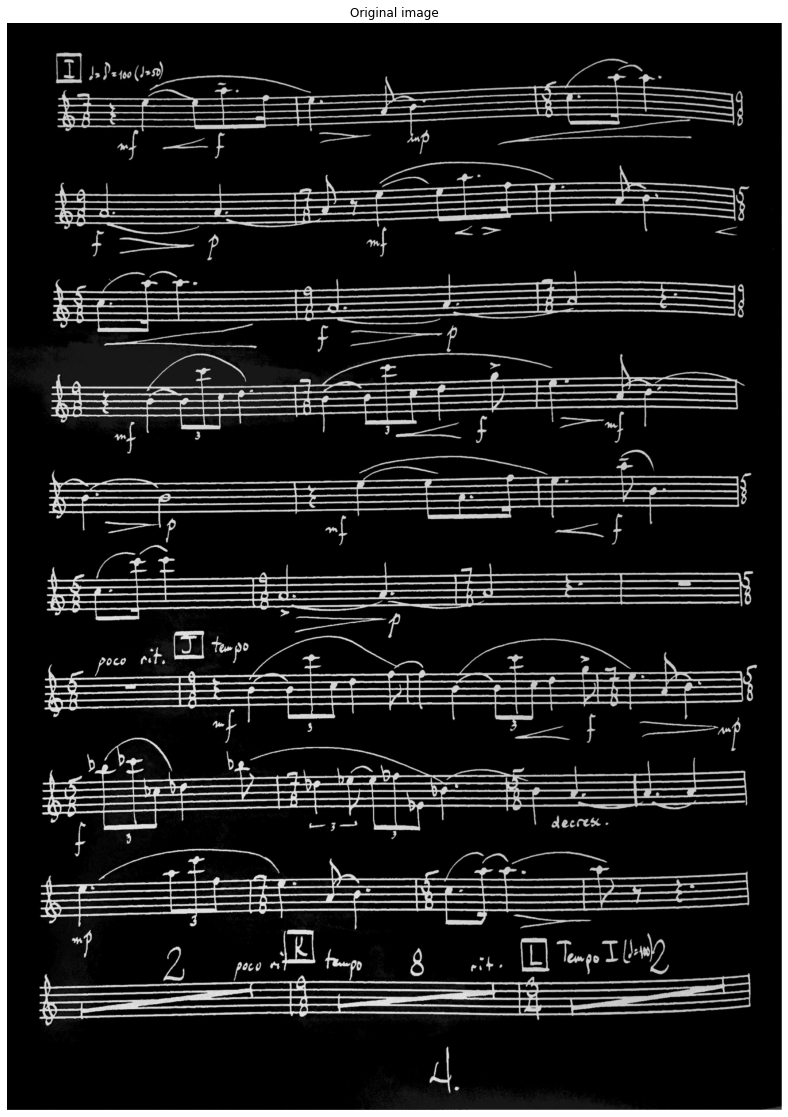

In [8]:
music = np.asarray(Image.open("./data/nc4.jpg"))
red = music[..., 0]
green = music[..., 1]
blue = music[..., 2]

music = 0.21 * red + 0.72 * green + 0.07 * blue
music = ~(music.astype(np.uint8))

# plot original image
plt.figure(figsize=(30, 20))
plt.imshow(music, cmap=plt.cm.gray)
plt.axis('off')
plt.title('Original image')

plt.show()



(-0.5, 2349.5, 3299.5, -0.5)

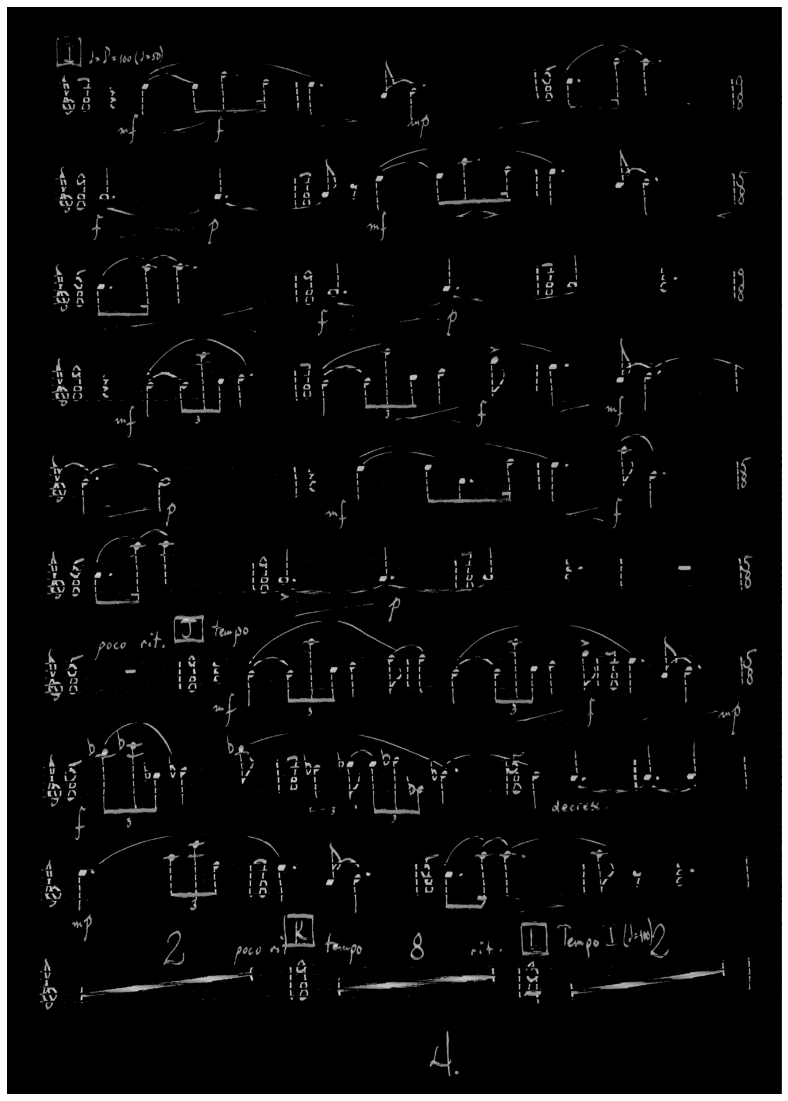

In [10]:
test_notes9=scipy.fftpack.fftshift(scipy.fftpack.fft2(music))
test_notes9[0:1525, 1150:1210]=0
test_notes9[1765: 3300-1, 1150:1210]=0


#test5[2000:3300-1, 1150: 1210]=0
#plt.figure(figsize=(30, 20))
#plt.imshow(np.log(np.abs(test_notes9)))

notes9 = np.real(scipy.fftpack.ifft2(scipy.fftpack.fftshift((test_notes9))))
#plt.figure(figsize=(30, 20))
thresh_note9=150
notes9[notes9 < thresh_note9]=0
plt.figure(figsize=(30, 20))
plt.imshow(notes9, cmap=plt.cm.gray)
plt.axis('off')


In [12]:

import cv2

image = cv2.cvtColor(notes9 ,cv2.COLOR_GRAY2RGB)  # You can convert the image to CIELAB space if you need.
slic = Slic(num_components=1600, compactness=10)
assignment = slic.iterate(image) # Cluster Map
print(assignment)
print(slic.slic_model.clusters) # The cluster information of superpixels.


error: OpenCV(3.4.2) /opt/concourse/worker/volumes/live/9523d527-1b9e-48e0-7ed0-a36adde286f0/volume/opencv-suite_1535558719691/work/modules/imgproc/src/color.hpp:253: error: (-215:Assertion failed) VScn::contains(scn) && VDcn::contains(dcn) && VDepth::contains(depth) in function 'CvtHelper'
